In [1]:
!pip install pandas matplotlib requests
!pip install pycountry-convert

   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   -- ------------------------------------- 0.4/6.2 MB 7.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.5/6.2 MB 6.8 MB/s eta 0:00:01
   ----- ---------------------------------- 0.8/6.2 MB 6.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.0/6.2 MB 6.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.2/6.2 MB 5.6 MB/s eta 0:00:01
   --------- ------------------------------ 1.5/6.2 MB 5.5 MB/s eta 0:00:01
   ----------- ---------------------------- 1.7/6.2 MB 5.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.9/6.2 MB 5.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.2/6.2 MB 5.3 MB/s eta 0:00:01
   --------------- ------------------------ 2.4/6.2 MB 5.3 MB/s eta 0:00:01
   ----------------- ---------------------- 2.7/6.2 MB 5.3 MB/s eta 0:00:01
   ------------------ --------------------- 2.9/6.2 MB 5.3 MB/s eta 0:00:01
   ----------------

In [1]:
!pip install scipy

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_1 = pd.read_csv("sr_1-Mobiletest's.csv",index_col=False);
df_2 = pd.read_csv("sr_2-Broadbandtest's.csv",index_col=False);

In [4]:
df_1.columns

Index(['Unnamed: 0', 'Countries', 'Speed in Mbps'], dtype='object')

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     138 non-null    int64  
 1   Countries      138 non-null    object 
 2   Speed in Mbps  138 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


## making new data frame and adding ranking column in dataframe

In [6]:
df_1 = df_1.rename(columns={"Unnamed: 0":"rank","Countries":"Countries","Speed in Mbps":"Speed in Mbps"})
df_2 = df_2.rename(columns={"Unnamed: 0":"rank_broadband","Countries":"Countries","Speed in Mbps":"Speed in Mbps"})

In [7]:
# df_1.count()

## using statistics - mean, max 

In [8]:
df_1.describe()

,rank,Speed in Mbps
count,138.000000,138.000000
mean,68.500000,32.422319
std,39.981246,19.083786
min,0.000000,5.710000
25%,34.250000,17.760000
50%,68.500000,28.190000
75%,102.750000,43.925000
max,137.000000,100.220000


In [9]:
df_1.isna().sum()

rank             0
Countries        0
Speed in Mbps    0
dtype: int64

In [10]:
# feature engineering - 

## Mapping 50 Rows

In [11]:
# import matplotlib.ticker as ticker
# tick_spacing = 1
# df_1 = df_1[:50]
# # plt.figure().set_figwidth(30)
# fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# ax.scatter(x = df_1['Countries'], y = df_1['Speed in Mbps'])
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# plt.xticks(rotation=90)
# plt.xlabel("Name of Countries")
# plt.ylabel("Speed in MBPS")
# plt.show()

In [12]:
df_2.head()

,rank_broadband,Countries,Speed in Mbps
0,0,Singapore ...,205.13
1,1,Hong Kong (S...,183.24
2,2,Thailand ...,170.14
3,3,Romania ...,159.31
4,4,Switzerland ...,155.94


## Mapping Countries with speed less than 60 Mbps

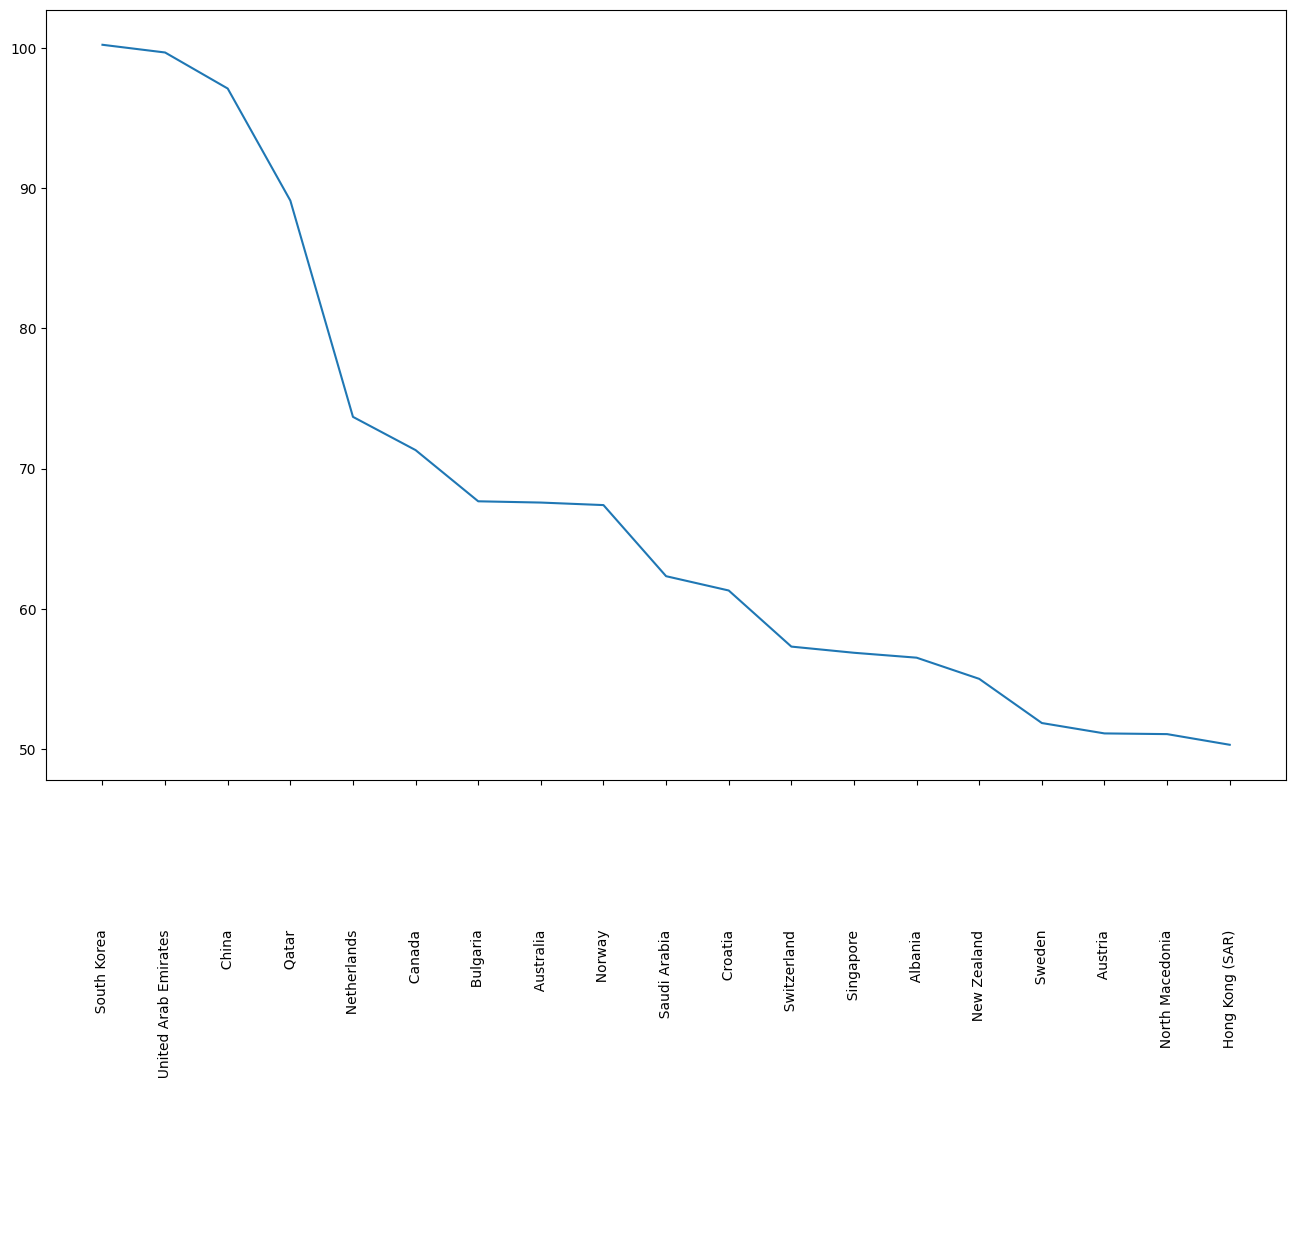

In [13]:
df_compare = df_1['Speed in Mbps']
tick_spacing = 1
sub_set = df_1 [df_1['Speed in Mbps'] > 50]
sub_set_2 = df_2 [df_2['Speed in Mbps'] > 50].head(19)
plt.subplots(figsize=(16,10), dpi= 100)
plt.xticks(rotation=90)
plt.plot(sub_set['Countries'],sub_set['Speed in Mbps'])
# plt.plot(sub_set_2['Countries'],sub_set_2['Speed in Mbps'])

In [14]:
map_corr_sub_set_2 = sub_set_2[['rank_broadband','Speed in Mbps']]

In [15]:
correlations = map_corr_sub_set_2.corr()

In [16]:
# import numpy as np
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# # ax.set_xticklabels(cols)
# # ax.set_yticklabels(cols)
# plt.show()

In [17]:
# feature engineering # currently we don't have any outlier in dataset

## marking difference in internet speed 

In [18]:
df_1.head()

,rank,Countries,Speed in Mbps
0,0,South Korea ...,100.22
1,1,United Arab ...,99.67
2,2,China ...,97.10
3,3,Qatar ...,89.11
4,4,Netherlands ...,73.69


In [19]:
df_1["Speed Difference"] = df_1["Speed in Mbps"].diff() 
df_1["Percentage Change"] = df_1["Speed in Mbps"].diff().pct_change() 

In [20]:
df_1.head()

,rank,Countries,Speed in Mbps,Speed Difference,Percentage Change
0,0,South Korea ...,100.22,NaN,NaN
1,1,United Arab ...,99.67,-0.55,NaN
2,2,China ...,97.10,-2.57,3.672727
3,3,Qatar ...,89.11,-7.99,2.108949
4,4,Netherlands ...,73.69,-15.42,0.929912


In [21]:
# two columns to add
# mean of continent 
# diff bet speed in mbps and mean of continent 
# EDA on above

In [22]:
import pandas as pd
asia = ['Afghanistan', 'Bahrain', 'United Arab Emirates','Saudi Arabia', 'Kuwait', 'Qatar', 'Oman',
    'Sultanate of Oman','Lebanon', 'Iraq', 'Yemen', 'Pakistan', 'Lebanon', 'Philippines', 'Jordan']
europe = ['Germany','Spain', 'France', 'Italy', 'Netherlands', 'Norway', 'Sweden','Czech Republic', 'Finland',
      'Denmark', 'Czech Republic', 'Switzerland', 'UK', 'UK&I', 'Poland', 'Greece','Austria',
      'Bulgaria', 'Hungary', 'Luxembourg', 'Romania' , 'Slovakia', 'Estonia', 'Slovenia','Portugal',
      'Croatia', 'Lithuania', 'Latvia','Serbia', 'Estonia', 'ME', 'Iceland' ]
africa = ['Morocco', 'Tunisia', 'Africa', 'ZA', 'Kenya']
other = ['USA', 'Australia', 'Reunion', 'Faroe Islands']

def GetConti(Countries):
    if Countries in asia:
        return "Asia"
    elif Countries in europe:
        return "Europe"
    elif Countries in africa:
        return "Africa"
    else:
        return "other"

df = pd.DataFrame(df_1["Countries"])
df_1['Continent'] = df['Countries'].apply(lambda x: GetConti(x))

138

In [23]:
df_1 = df_1.drop(['Continent'], axis=1)
df_1

,rank,Countries,Speed in Mbps,Speed Difference,Percentage Change,continent
0,0,South Korea ...,100.22,NaN,NaN,asia
1,1,United Arab ...,99.67,-0.55,NaN,other
2,2,China ...,97.10,-2.57,3.672727,asia
3,3,Qatar ...,89.11,-7.99,2.108949,europe
4,4,Netherlands ...,73.69,-15.42,0.929912,asia
...,...,...,...,...,...,...
133,133,Tajikistan ...,10.20,-0.13,-0.409091,europe
134,134,Palestine ...,8.12,-2.08,15.000000,other
135,135,Sudan ...,8.08,-0.04,-0.980769,asia
136,136,Venezuela ...,6.15,-1.93,47.250000,other


In [24]:
dt1 = df_1['continent'].value_counts()

In [25]:
dt2 = df_1.groupby("continent")["Speed in Mbps"].mean()

In [26]:
dt3 = dt1 - dt2

In [27]:
dt3

continent
asia            32.081846
europe         -18.898947
europeeurope   -10.931429
other           15.319149
dtype: float64

In [28]:
df_1

,rank,Countries,Speed in Mbps,Speed Difference,Percentage Change,continent
0,0,South Korea ...,100.22,NaN,NaN,asia
1,1,United Arab ...,99.67,-0.55,NaN,other
2,2,China ...,97.10,-2.57,3.672727,asia
3,3,Qatar ...,89.11,-7.99,2.108949,europe
4,4,Netherlands ...,73.69,-15.42,0.929912,asia
...,...,...,...,...,...,...
133,133,Tajikistan ...,10.20,-0.13,-0.409091,europe
134,134,Palestine ...,8.12,-2.08,15.000000,other
135,135,Sudan ...,8.08,-0.04,-0.980769,asia
136,136,Venezuela ...,6.15,-1.93,47.250000,other


## EDA on Above Dataframe "df_1"

In [64]:
## Getting outliers using zscore 

In [67]:
import numpy as np
from scipy import stats

In [68]:
z = np.abs(stats.zscore(df_1['Speed in Mbps']))

In [69]:
threshold = -10
outliers = df_1[z > threshold]

In [70]:
print(outliers)

     rank                                          Countries  Speed in Mbps  \
0       0                                    South Korea ...         100.22   
1       1                                    United Arab ...          99.67   
2       2                                    China       ...          97.10   
3       3                                    Qatar       ...          89.11   
4       4                                    Netherlands ...          73.69   
..    ...                                                ...            ...   
133   133                                    Tajikistan  ...          10.20   
134   134                                    Palestine   ...           8.12   
135   135                                    Sudan       ...           8.08   
136   136                                    Venezuela   ...           6.15   
137   137                                    Afghanistan ...           5.71   

     Speed Difference  Percentage Change continent 

In [71]:
print(z)

0      3.565575
1      3.536650
2      3.401490
3      2.981284
4      2.170325
         ...   
133    1.168703
134    1.278093
135    1.280197
136    1.381698
137    1.404838
Name: Speed in Mbps, Length: 138, dtype: float64


In [72]:
## value counts for making range of countries with better internet speed 

In [73]:
(df_1['Speed Difference'] >= 50) & (df_1['Speed Difference'] < 100)

0      False
1      False
2      False
3      False
4      False
       ...  
133    False
134    False
135    False
136    False
137    False
Name: Speed Difference, Length: 138, dtype: bool

In [74]:
cluster1 = (df_1['Speed in Mbps'] >= 50) & (df_1['Speed in Mbps'] < 100)

In [75]:
df_1[cluster1]

,rank,Countries,Speed in Mbps,Speed Difference,Percentage Change,continent
1,1,United Arab ...,99.67,-0.55,NaN,other
2,2,China ...,97.10,-2.57,3.672727,asia
3,3,Qatar ...,89.11,-7.99,2.108949,europe
4,4,Netherlands ...,73.69,-15.42,0.929912,asia
5,5,Canada ...,71.32,-2.37,-0.846304,other
6,6,Bulgaria ...,67.67,-3.65,0.540084,other
7,7,Australia ...,67.58,-0.09,-0.975342,asia
8,8,Norway ...,67.40,-0.18,1.000000,other
9,9,Saudi Arabia...,62.33,-5.07,27.166667,asia
10,10,Croatia ...,61.31,-1.02,-0.798817,europe
